## DESAFIO N°2

#### **Integrantes:**
- Rodriguez Juan Martin
- Carsillo Juan Martin
#### **Datasets Elegidos**
1. Airbnb Open Data
2. Breast cancer
3. Canciones populares de Rock en Spotify

#### Importo librerias


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Dataset N°1:** 

**Descripcion del dataset**

Desde 2008, los huéspedes y anfitriones han utilizado Airbnb para viajar de una manera más única y personalizada. Como parte de la iniciativa Airbnb Inside, este conjunto de datos describe la actividad de listado de casas de familia en la ciudad de Nueva York.

La siguiente actividad de Airbnb se incluye en este conjunto de datos de Nueva York: Anuncios, incluidas las descripciones completas y la puntuación media de las opiniones Reseñas, incluido el identificador único de cada revisor y los comentarios detallados,Calendario, incluido el identificador del anuncio y el precio y la disponibilidad para ese día.



In [2]:
df = pd.read_csv("./Data Sets/Airbnb_Open_Data.csv")

df.head()


C:\Users\JUAN\AppData\Local\Temp\ipykernel_8248\428709797.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Data Sets/Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df = df.dropna(subset=['host_identity_verified'])
df = df.dropna(subset=['service fee'])


df['service fee'] = df['service fee'].astype(str)
df['service fee'] = df['service fee'].str[1:]
df['service fee'] = df['service fee'].astype(int)

df['service fee']

0         93
1          8
3          4
4          1
5         15
          ..
102594    69
102595    67
102596    98
102597     9
102598     6
Name: service fee, Length: 102038, dtype: int32

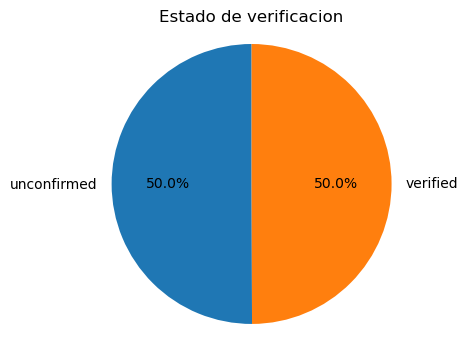

In [5]:
host = df['host_identity_verified']
labels = host.unique()

fig1, (ax1) = plt.subplots(ncols=1,figsize=(5,4))


ax1.pie(host.value_counts(), labels=labels,autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
ax1.set_title("Estado de verificacion")

plt.show()

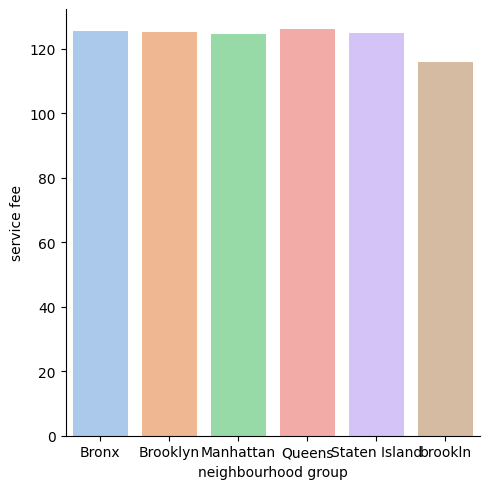

In [139]:
comisionPorBarrio = df[['neighbourhood group','service fee']]


comisionPorBarrio = comisionPorBarrio.groupby('neighbourhood group').mean().reset_index()

sns.catplot(data=comisionPorBarrio,x='neighbourhood group',y='service fee',kind='bar',palette="pastel")




**Variables mas importantes**

- **NAME**: Nombre listado
- **Neighbourhood**: Vecindario de la propiedad
- **Country**: Pais
- **cancellation_policy**: Poliza de cancelacion
- **room type**: Tipo de habitacion (Habitacion privada o casa entera)
- **price**: Precio de lista
- **service fee**: Comision de servicio
- **minimum nights**: Cantidad minima de noches para reservar
- **number of reviews**: Cantidad de reviews
- **last review**: ultima review
- **reviews per month**: Review por mes
- **house_rules**: Reglas de la casa

### **Dataset N°2:** 

**Descripcion del dataset**

Este conjunto de datos de pacientes con cáncer de mama se obtuvo de la actualización de noviembre de 2017 del Programa SEER del NCI, que proporciona información sobre estadísticas de cáncer basadas en la población. El conjunto de datos involucró a pacientes femeninas con cáncer de mama de conducto infiltrante y carcinoma lobulillar diagnosticados en 2006-2010. Se excluyeron los pacientes con tamaño tumoral desconocido, los LN regionales examinados, los LN regionales positivos y los pacientes cuyos meses de supervivencia fueron inferiores a 1 mes; por lo tanto, finalmente se incluyeron 4024 pacientes.


In [6]:
df2 = pd.read_csv("./Data Sets/Breast_Cancer.csv")

df2.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


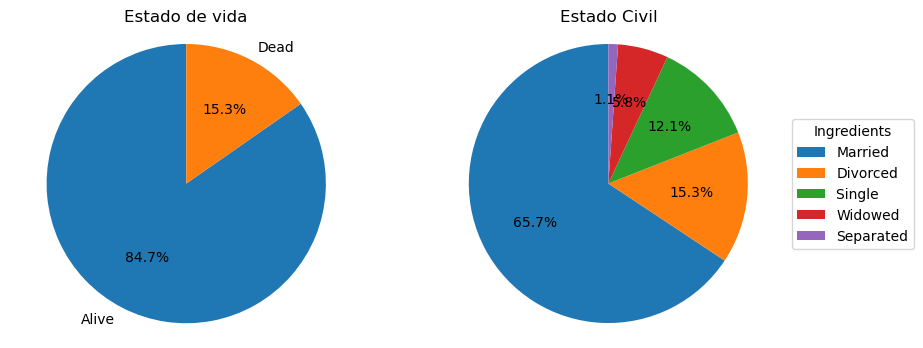

In [7]:
alive_dead = df2['Status']
labels = alive_dead.unique()

marital_status = df2['Marital Status']
labels2 = marital_status.unique()




fig1, (ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))



ax1.pie(alive_dead.value_counts(), labels=labels,autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
ax1.set_title("Estado de vida")


wedges,texts,autotexts= ax2.pie(marital_status.value_counts(), autopct='%1.1f%%',startangle=90)
ax2.axis('equal')
ax2.set_title("Estado Civil")

ax2.legend(wedges, labels2,
        title="Ingredients",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1))


plt.show()


<BarContainer object of 40 artists>

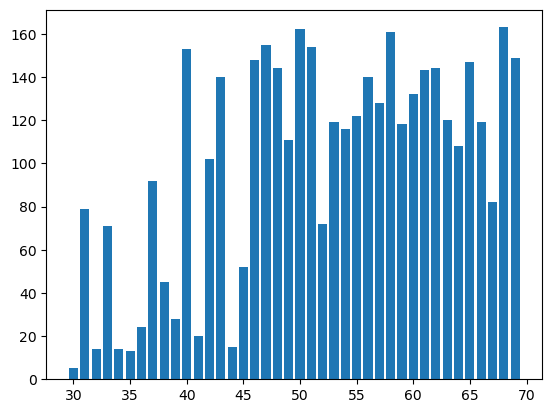

In [9]:
edades = df2['Age']
labels3 = edades.unique()

fig2, ax4 = plt.subplots()

ax4.bar(labels3,edades.value_counts(),label='Edad de las mujeres')


**Variables mas importantes**

- **AGE**: Edad de la paciente
- **Tumor Size**: Tamaño del tumor
- **Survival Months**: Meses de supervivencia
- **Status**: Estado de la paciente

### **Dataset N°3:** 

**Descripcion del dataset**

Este dataset posee información de 5484 canciones de rock, incluyendo distintas características evaluadas por Spotify. Abarca desde los años '50 hasta la actualidad.
Con estos datos podremos observar las características de las canciones, dependiendo el año de lanzamiento, y la relación con su popularidad en la plataforma.


In [6]:
df3 = pd.read_csv("./Data Sets/History_Of_Rock_Spotify.csv")
df3.head()

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931


In [11]:
df3.columns

Index(['index', 'name', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'danceability.1', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
       'tempo', 'time_signature', 'valence'],
      dtype='object')

Text(0, 0.5, 'Cantidad de canciones')

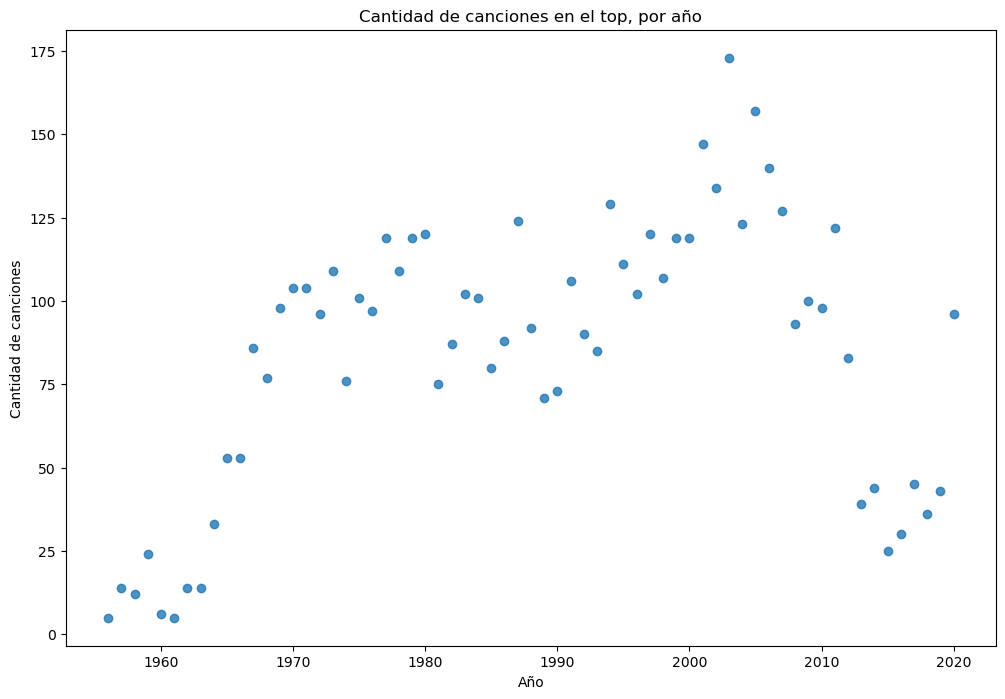

In [69]:
year = df3['release_date'].value_counts()



fig3, ax3 = plt.subplots(figsize=(12, 8))
ax3.scatter(year.index, year, alpha=0.8)
ax3.set_title('Cantidad de canciones en el top, por año')
ax3.set_xlabel('Año')
ax3.set_ylabel('Cantidad de canciones')



<BarContainer object of 9 artists>

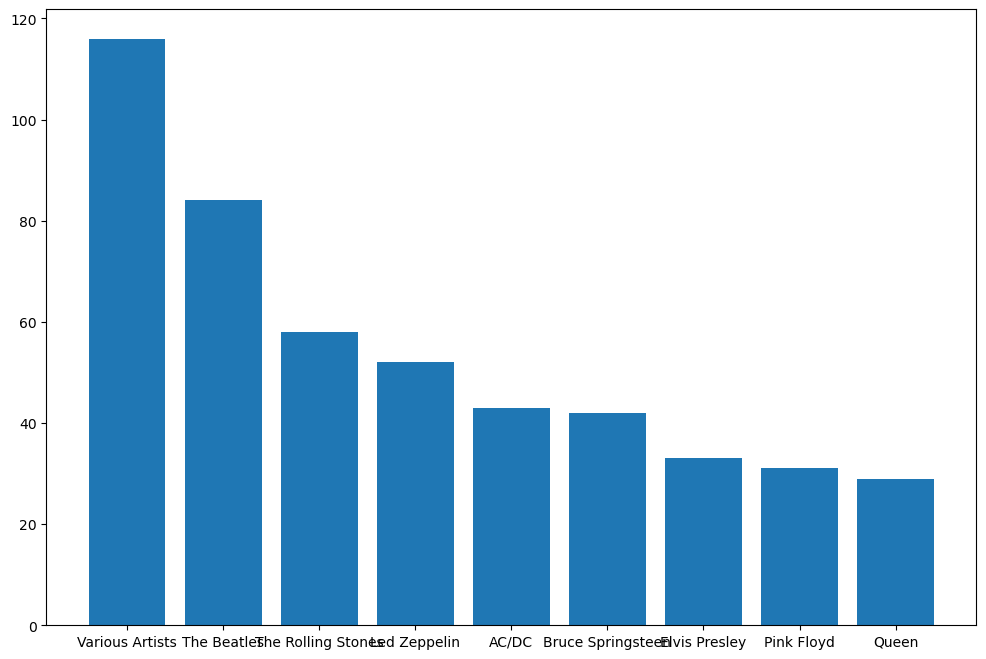

In [21]:

import numpy as np
banda = df3['artist'].value_counts()
banda[0:9]

fig3, ax3 = plt.subplots(figsize=(12, 8))
ax3.bar(banda.index[0:9],banda[0:9],label='Bandas con mas canciones en el top')